In [1]:
from sympy import *
from sympy.solvers import solve
init_printing(use_unicode=True)

## Functions
### Solve the Lyapunov equation for $\Sigma$

In [2]:
def solve_lyapunov(M: Matrix, C: Matrix, p: int) -> Matrix:
    Sigma = MatrixSymbol("Sigma", p, p).as_explicit()
    Sigma_solved = solve(M*Sigma + Sigma*M.T + C, Sigma)
    Sigma_solved
    scheme = [[Sigma_solved[Sigma[i,j]] for i in range(p)] for j in range(p)]
    Sigma_new = Matrix(scheme)
    return Sigma_new

### Adjust $M$ after shift intervention
Since we define the shift intervention on a node $i$ of the process $X(t)$ with mean zero to be described as
$$dX^I(t) = (MX^I(t)-b_ie_i)dt+DdW(t) = M(X^I(t)-M^{-1}b_ie_i)dt+DdW(t)$$
the new mean after the intervention has changed to be $\mathbb{E}(X^I(t)) = M^{-1}b_ie_i$. Therefore, if we know the empirical mean of the process $X^I(t)$ after the shift intervention, we also know the $i$-th column of the inverse of the drift matrix $M$
$$(M^{-1})_{\cdot i} = M^{-1}e_i = \frac{1}{b_i}\mathbb{E}(X^I(t)).$$

In [12]:
def adjust_M(M: Matrix, A: list[int], b: list[float], emp_mean: list[float], p: int) -> Matrix:
    if (len(emp_mean) != p) | (len(A) != len(b)):
        print("The dimensions of the input don't match.")
        return M
    M_inv = M.inv()
    for index, col in A:
        for row in range(p):
            M_inv[row, col] = (1 / b[index]) * emp_mean[row]
    return M_inv.inv()

## 2 Nodes
### 2 nodes with a 2-cycle

<div>
<img src="graph1.png" width="400"/>
</div>

Let's start by defining the drift matrix $M$ corresponding to the graph $G=(V,E)$ with nodes $V=\{1,2\}$ and edges $E=\{1\to 1, 1\to 2, 2\to 1, 2\to 2\}$.

In [3]:
p = 2

m11 = symbols('m11')
m12 = symbols('m12')
m21 = symbols('m21')
m22 = symbols('m22')

M = Matrix([[m11, m12], [m21, m22]])
M_inv = M.inv()

C = 2 * eye(p)

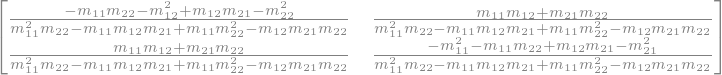

In [4]:
cov = solve_lyapunov(M, C, p)
cov

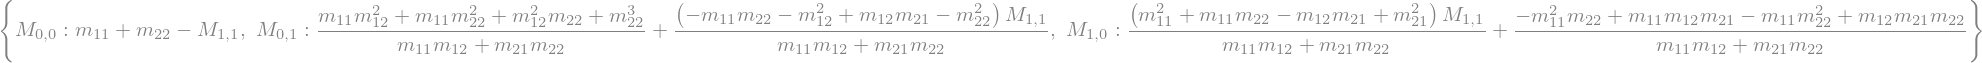

In [5]:
M = MatrixSymbol("M", p, p).as_explicit()
solve(M*cov + cov*M.T + C, M)

## 3 Nodes
### 3 nodes with a 2-cycle and a 3-cycle

<div>
<img src="graph2.png" width="400"/>
</div>

Let's start by defining the drift matrix $M$ corresponding to the graph $G=(V,E)$ with nodes $V=\{1,2,3\}$ and edges $E=\{1\to 1, 1\to 2, 2\to 2, 2\to 3, 3\to 1, 3\to 2, 3\to 3\}$.

In [6]:
p = 3

m11 = symbols('m11')
m12 = symbols('m12')
m13 = symbols('m13')
m21 = symbols('m21')
m22 = symbols('m22')
m23 = symbols('m23')
m31 = symbols('m31')
m32 = symbols('m32')
m33 = symbols('m33')

substitute = {m12: 0, m31: 0}

M = (Matrix([[m11, m12, m13], [m21, m22, m23], [m31, m32, m33]])).subs(substitute)
M_inv = M.inv()

C = 2 * eye(p)

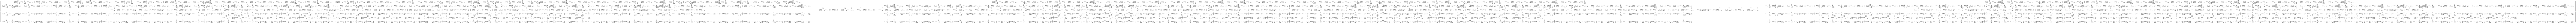

In [7]:
cov = solve_lyapunov(M, C, p)
cov

### 3 nodes with a 2-cycle and connected by treks

<div>
<img src="graph3.png" width="400"/>
</div>

Let's start by defining the drift matrix $M$ corresponding to the graph $G=(V,E)$ with nodes $V=\{1,2,3\}$ and edges $E=\{1\to 1, 1\to 2, 1\to 3, 2\to 2, 2\to 3, 3\to 2, 3\to 3\}$.

In [10]:
p = 3

m11 = symbols('m11')
m12 = symbols('m12')
m13 = symbols('m13')
m21 = symbols('m21')
m22 = symbols('m22')
m23 = symbols('m23')
m31 = symbols('m31')
m32 = symbols('m32')
m33 = symbols('m33')

substitute = {m12: 0, m13: 0}

M = (Matrix([[m11, m12, m13], [m21, m22, m23], [m31, m32, m33]])).subs(substitute)
M_inv = M.inv()

C = 2 * eye(p)

In [11]:
cov = solve_lyapunov(M, C, p)
cov

KeyboardInterrupt: 

### 3 nodes with a 2-cycle and not connected by treks

<div>
<img src="graph4.png" width="400"/>
</div>

Let's start by defining the drift matrix $M$ corresponding to the graph $G=(V,E)$ with nodes $V=\{1,2,3\}$ and edges $E=\{1\to 1, 1\to 2, 2\to 2, 2\to 3, 3\to 2, 3\to 3\}$.

In [8]:
p = 3

m11 = symbols('m11')
m12 = symbols('m12')
m13 = symbols('m13')
m21 = symbols('m21')
m22 = symbols('m22')
m23 = symbols('m23')
m31 = symbols('m31')
m32 = symbols('m32')
m33 = symbols('m33')

substitute = {m12: 0, m13: 0, m31: 0}

M = (Matrix([[m11, m12, m13], [m21, m22, m23], [m31, m32, m33]])).subs(substitute)
M_inv = M.inv()

C = 2 * eye(p)

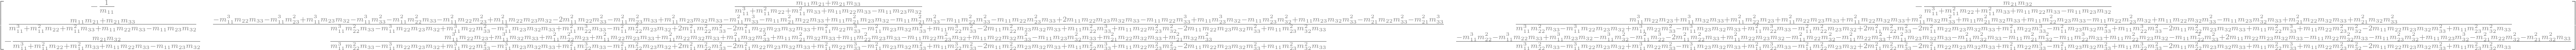

In [9]:
cov = solve_lyapunov(M, C, p)
cov